In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
from scipy import optimize as opt

In [58]:
f = lambda x : (x - 1)**4 + x**2

In [59]:
def find_root_bisection(f, min, max, precision=0.001):
    while abs(max-min) > precision:
        c= (min + max)/2
        if f(c) == 0:
            return c
        elif f(min) * f(c) < 0:
            max = c
        else:
            min = c
    return (min + max)/2   

In [60]:
def print_a_function(f, values):
    res = minimize_scalar(f, method='brent')
    print('x_min: % .02f, f(x_min): % .02f' %  (res.x, res.fun))
    
    # plot curve
    x = values
    y = [f(val) for val in x]
    plt.plot(x, y, color='blue', label='f')
    
    # plot optima
    plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')
    
    plt.grid()
    plt.legend(loc = 1)

In [61]:
def find_root_newton_raphson(f, f_deriv, x):
    for i in range(100):
        if abs(f(x)) < 0.001:
            return x
        x = x - f(x) / f_deriv(x)
    return None

In [62]:
def gradient_descent(f, f_prime, start, learning_rate = 0.1):
    xk = start
    while True:
        xk_plus = xk - learning_rate * f_prime(xk)
        if abs(xk_plus - xk) < 0.001:
            break
        xk = xk_plus
    return xk

In [63]:
def solve_linear_problem(A, b, c):
    bounds = [(0, None), (0, None)]
    res = opt.linprog(c, A_ub=A, b_ub=b, bounds=bounds)
    return res.fun, res.x

x_min:  0.41, f(x_min):  0.29


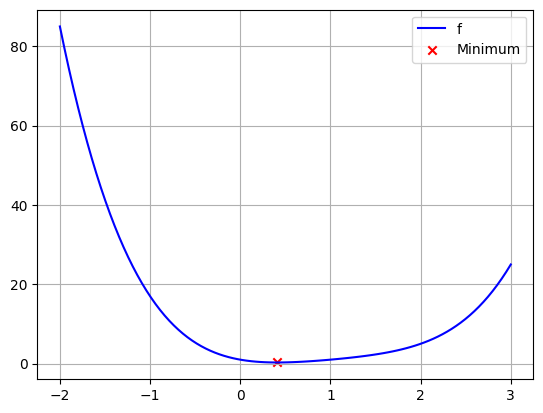

In [64]:
values = np.linspace(-2, 3, 100)
print_a_function(f, values)

In [65]:
root_bisection = find_root_bisection(f, -2, 3)
print("Root (Bisection Method): {:.2f}".format(root_bisection))

Root (Bisection Method): 3.00


In [69]:
f_prime = lambda x: 4 * ((x - 1) ** 3) + 2 * x
guess = 0.1
root_newton_raphson = find_root_newton_raphson(f, f_prime, guess)
if root_newton_raphson:
    print("Root (Newton-Raphson Method): % .2f" % root_newton_raphson)
else:
    print("Root (Newton-Raphson Method): No valid result")

Root (Newton-Raphson Method): No valid result


In [70]:
f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
f_min = f(x_min)

print("xmin: % 0.2f, f(x_min): % 0.2f" %  (x_min, f_min))

xmin:  0.40, f(x_min):  0.29


In [71]:
c = np.array([-3, -2])
A = np.array([[1, 0], [0, 1], [3, 2]])
b = np.array([4, 3, 18])
optimal_value, optimal_arg = solve_linear_problem(A, b, c)

print("The optimal value is: ", optimal_value, " and is reached for x = ", optimal_arg)

The optimal value is:  -18.0  and is reached for x =  [4. 3.]
